In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [2]:
df=pd.read_csv("C:\\Users\\sohan\\OneDrive\\เอกสาร\\data\\ANN\\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


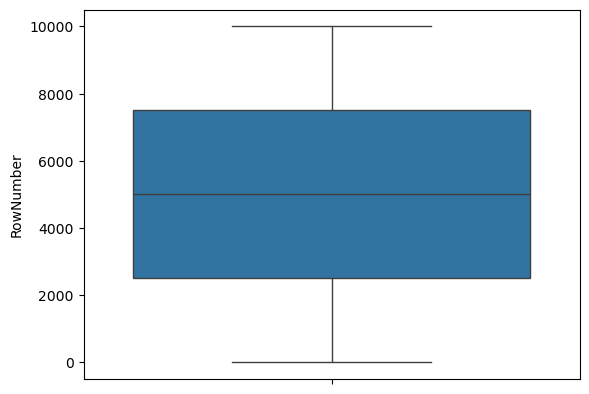

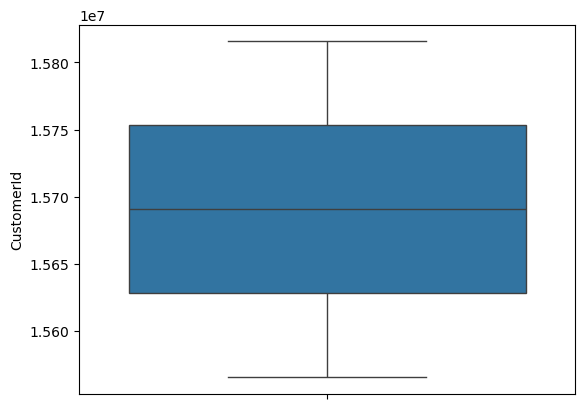

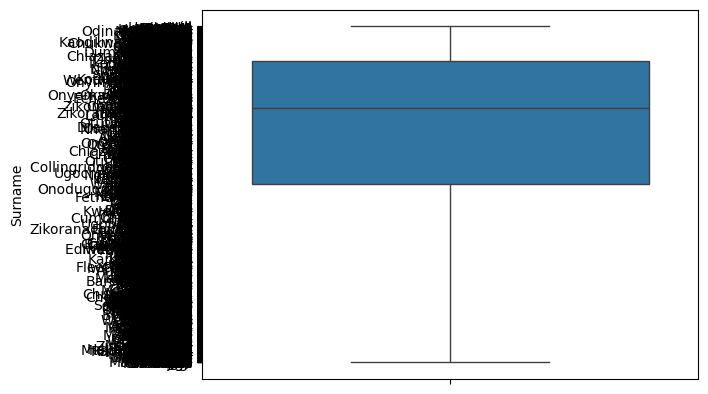

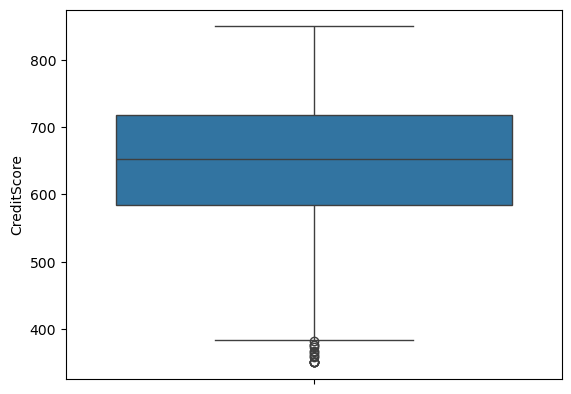

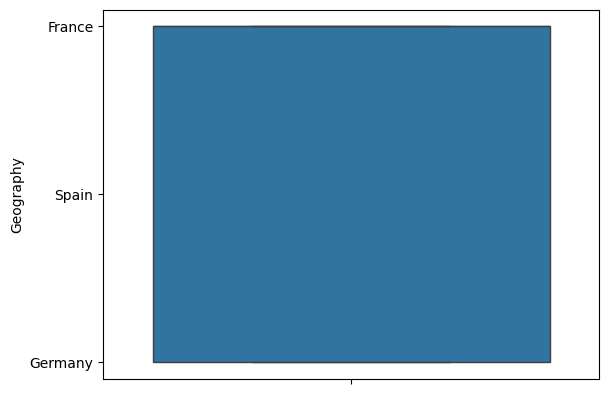

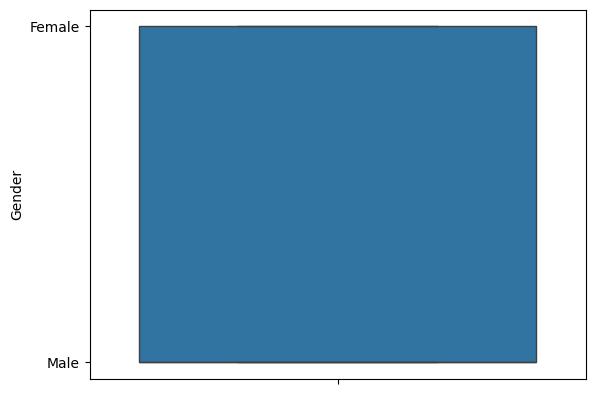

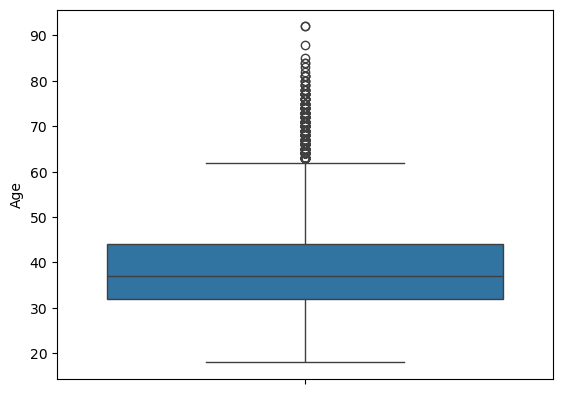

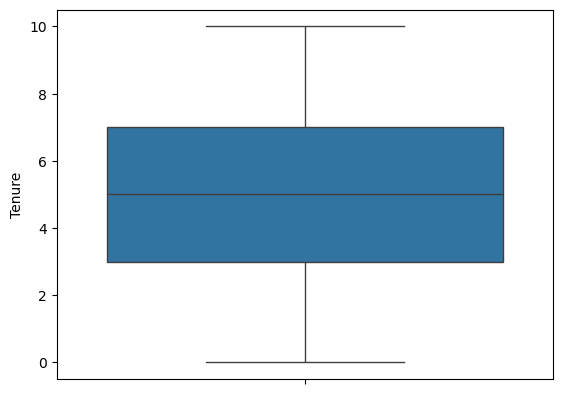

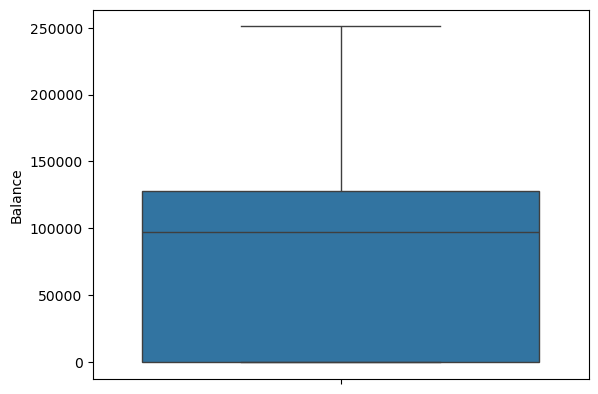

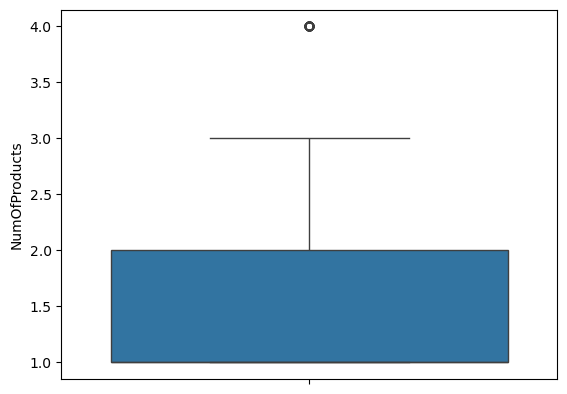

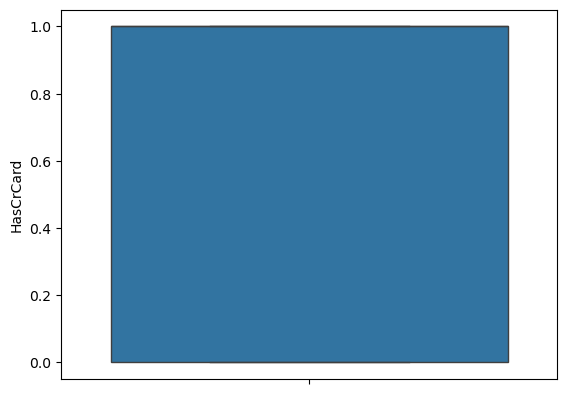

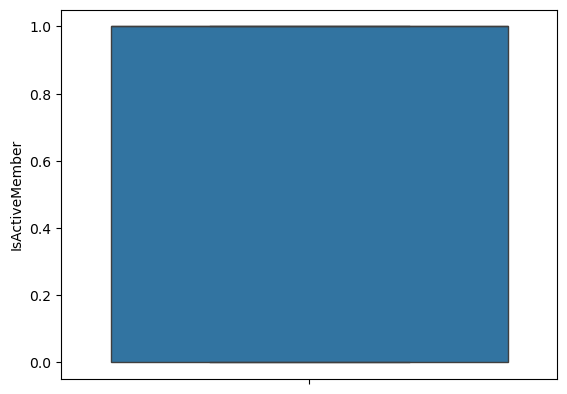

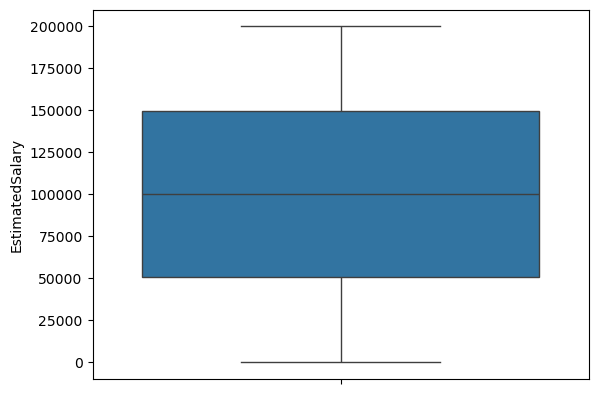

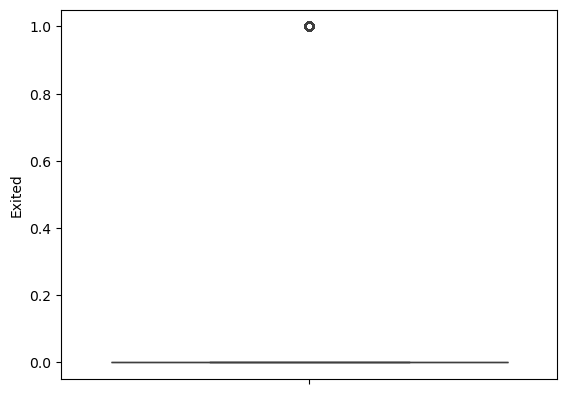

In [8]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [9]:
std=StandardScaler()

In [10]:
df[['CreditScore','Balance','EstimatedSalary']]=std.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,France,Female,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,Spain,Female,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,France,Female,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,France,Female,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,Spain,Female,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,France,Male,39,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,Johnstone,-1.391939,France,Male,35,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,Liu,0.604988,France,Female,36,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,Sabbatini,1.256835,Germany,Male,42,3,-0.022608,2,1,0,-0.125231,1


In [12]:
oe=OrdinalEncoder()

In [13]:
df[['Surname','Geography','Gender']]=oe.fit_transform(df[['Surname','Geography','Gender']])

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115.0,-0.326221,0.0,0.0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,1177.0,-0.440036,2.0,0.0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,2040.0,-1.536794,0.0,0.0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,289.0,0.501521,0.0,0.0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,1822.0,2.063884,2.0,0.0,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999.0,1.246488,0.0,1.0,39,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,1336.0,-1.391939,0.0,1.0,35,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,1570.0,0.604988,0.0,0.0,36,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,2345.0,1.256835,1.0,1.0,42,3,-0.022608,2,1,0,-0.125231,1


In [15]:
X=df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)

In [16]:
y=df['Exited']

In [17]:
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.0,0.0,42,2,-1.225848,1,1,1,0.021886
1,-0.440036,2.0,0.0,41,1,0.117350,1,0,1,0.216534
2,-1.536794,0.0,0.0,42,8,1.333053,3,1,0,0.240687
3,0.501521,0.0,0.0,39,1,-1.225848,2,0,0,-0.108918
4,2.063884,2.0,0.0,43,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.0,1.0,39,5,-1.225848,2,1,0,-0.066419
9996,-1.391939,0.0,1.0,35,10,-0.306379,1,1,1,0.027988
9997,0.604988,0.0,0.0,36,7,-1.225848,1,0,1,-1.008643
9998,1.256835,1.0,1.0,42,3,-0.022608,2,1,0,-0.125231


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.20)

In [20]:
model=Sequential()

In [21]:
model.add(Dense(7,activation='relu',input_dim=10))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\Public\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5173 - loss: 1.0391 - val_accuracy: 0.8000 - val_loss: 0.5125
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.5230 - val_accuracy: 0.8010 - val_loss: 0.4904
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4945 - val_accuracy: 0.8015 - val_loss: 0.4742
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4858 - val_accuracy: 0.8050 - val_loss: 0.4611
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4692 - val_accuracy: 0.8050 - val_loss: 0.4469
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4520 - val_accuracy: 0.8145 - val_loss: 0.4405
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4416 - val_accuracy: 0.8135 - val_loss: 0.4368
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4422 - val_accuracy: 0.

In [24]:
model.layers[1].get_weights()

[array([[-0.28028262, -0.40726674,  0.34349623,  0.07510506, -0.65622246],
        [ 0.66694134,  0.61831987, -0.48023495, -0.4045839 , -0.13006473],
        [-0.05772632,  0.01072231,  0.498417  ,  0.13295586,  0.7099753 ],
        [ 0.4150514 ,  0.21711618,  0.5707289 , -0.3164901 ,  0.4269039 ],
        [-0.37993935,  0.2023717 ,  0.05657478,  0.18203092,  0.29039055],
        [ 0.53321344, -0.5656063 ,  0.31367368,  0.69159526, -0.08668494],
        [-0.03483725,  0.12489884, -0.68800044, -0.6199461 ,  0.08753302]],
       dtype=float32),
 array([ 0.        ,  0.40411445, -0.22196719, -0.196284  ,  0.4011519 ],
       dtype=float32)]

In [25]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
history.history

{'accuracy': [0.6888750195503235,
  0.7947499752044678,
  0.7947499752044678,
  0.7962499856948853,
  0.800125002861023,
  0.8037499785423279,
  0.8080000281333923,
  0.8106250166893005,
  0.8137500286102295,
  0.8103749752044678],
 'loss': [0.7020027041435242,
  0.5117250680923462,
  0.49079230427742004,
  0.47457563877105713,
  0.4620327651500702,
  0.45233362913131714,
  0.44765475392341614,
  0.44514912366867065,
  0.44325560331344604,
  0.44194215536117554],
 'val_accuracy': [0.800000011920929,
  0.8009999990463257,
  0.8015000224113464,
  0.8050000071525574,
  0.8050000071525574,
  0.8144999742507935,
  0.8134999871253967,
  0.8080000281333923,
  0.8165000081062317,
  0.815500020980835],
 'val_loss': [0.5124658942222595,
  0.490391343832016,
  0.4742316007614136,
  0.4611160457134247,
  0.4468507170677185,
  0.44050332903862,
  0.4367550015449524,
  0.4472537040710449,
  0.4319796860218048,
  0.4317318797111511]}

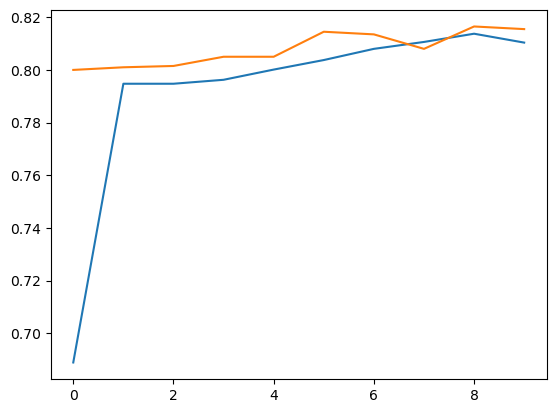

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

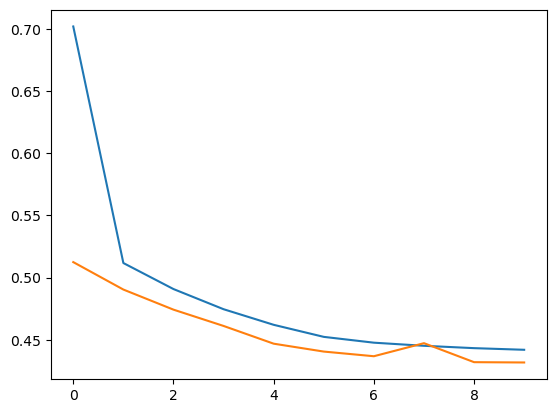

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [59]:
import pickle

In [61]:
pickle.dump(model,open('model.pkl','wb'))

In [65]:
model=pickle.load(open('model.pkl','rb'))

In [73]:
input_data=np.array([[-0.440036,2.0,0.0,41,1,0.117350	,1,0,1,0.216534]])

In [75]:
input_data

array([[-0.440036,  2.      ,  0.      , 41.      ,  1.      ,  0.11735 ,
         1.      ,  0.      ,  1.      ,  0.216534]])

In [79]:
prediction=model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [83]:
np.argmax(prediction)

0